In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
from PIL import Image as pil_image
from bokeh.io import output_notebook
import seaborn as sns
import os

sns.set_style('whitegrid')
sns.set_context('notebook')
output_notebook()

import amazon_products

data_dir = 'amazon_products_data_binary'
image_dir = os.path.join(data_dir, 'images')
full_file_name = os.path.join(data_dir, 'amazon_products.csv')
train_file_name = os.path.join(data_dir, 'amazon_products_train.csv')
test_file_name = os.path.join(data_dir, 'amazon_products_test.csv')

df = pd.read_csv(full_file_name)

Loading BokehJS ...

Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Target Distribution

In [ ]:
df.head(10)

In [ ]:
import seaborn as sns
import numpy as np
colors = ["windows blue", "amber", "greyish", "light red"]
with sns.xkcd_palette(colors): 
    ax = sns.countplot(y='product_category', data=df)
    
    # display counts directly on graph
    for p in ax.patches:
        x=p.get_bbox().get_points()[1, 0]
        y=p.get_bbox().get_points()[:, 1]
        ax.annotate('{:d}'.format(int(x)), (x + 50, np.mean(y)))
            
    sns.despine(left=True, bottom=True)
    
    ax.get_figure().savefig('target_distribution.pdf')

### Simple TFIDF Feature Engineering

In [ ]:
#title = df.groupby('product_category')['title']
title = df.groupby('product_category')['title']
amazon_products.text_plots.word_cloud(title.get_group('Clothing').tolist())

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,2, sharey=False, sharex=True, figsize=(20, 8))

colors = [sns.xkcd_rgb['windows blue'], sns.xkcd_rgb['amber']]
for i, (name, group) in enumerate(title):
    amazon_products.text_plots.frequency_plot(
        group.tolist(), 
        plot_n_words=20,
        color=colors[i],
        yaxis_label='{} - word'.format(name),
        ax=ax.flatten()[i])
#fig.subplots_adjust(wspace=0.5)

fig.savefig('word_counts.pdf')

In [6]:
emb = amazon_products.text_plots.text_embedding(df['title'][:5000], labels=df['product_category'][:5000])

KeyboardInterrupt: 

In [ ]:
from bokeh.plotting import show, output_file

colors = ["windows blue", "amber"]
with sns.xkcd_palette(colors): 
    p = amazon_products.bokeh_plots.scatter_plot(
        'component_1', 'component_2', hue='labels', 
        data=emb, table_column='text', hover_columns=['text'])
    
    show(p)

In [ ]:
from bokeh.plotting import show, output_file

#output_file('test_bokeh.html')

w2v = amazon_products.word2vec_plots.word2vec_embedding(df['title'][:5000], labels=df['product_category'][:5000])
colors = ["windows blue", "amber", "greyish", "light red"]
with sns.xkcd_palette(colors): 
    p = amazon_products.bokeh_plots.scatter_plot(
        'component_1', 'component_2', hue='labels', 
        data=w2v, table_column='text', hover_columns=['text'])
    
    show(p)

In [7]:
amazon_products.image_utils.load_image(df['image_file'][130], as_image=True, image_dir=image_dir)
df['title'][130]

'Harley-Davidson Hi-Vis Orage Knit Ear Warmer. 98369-10VM'

In [8]:
mean_hsv = amazon_products.image_features.mean_hsv('image_file',
                                                   data=df,
                                                   background='white',
                                                   image_directory=image_dir,
                                                   n_jobs=-1)
df['mean_hue'] = mean_hsv[:, 0]
df['mean_saturation'] = mean_hsv[:, 1]
df['mean_value'] = mean_hsv[:, 2]
df.head(10)

,title,image_file,product_category,mean_hue,mean_saturation,mean_value
0,Coffee Retro Women Lady Weave Rivet Leather St...,B00FDP6M9A.jpg,Accessory,0.212811,0.302169,0.370480
1,Fabric Fanny Pack- High Quality- Color Pattern...,B0077DSN7U.jpg,Clothing,0.315525,0.308997,0.508410
2,"Missoni Women's SM12 Ballet Flat,Beige,37.5 EU...",B0050SMHQW.jpg,Accessory,0.094796,0.402457,0.559374
3,Brown Reindeer Hat Chenille X Small,B007XF1WHK.jpg,Clothing,0.180063,0.411361,0.542204
4,ADJUSTABLE MULTI COLOR Cross Howlite Turquoise...,B008TUQY1C.jpg,Accessory,0.544087,0.151352,0.792359
5,2 Pieces of Pink Pearl Beaded Head Chain,B00AKJISCS.jpg,Accessory,0.712781,0.043574,0.416830
6,Lemon Beads,B004KV3JR6.jpg,Clothing,0.439480,0.135439,0.955946
7,Sterling Silver Celtic Knot Ring,B003TPHD1M.jpg,Accessory,0.194956,0.021141,0.765356
8,Quiksilver Men's All Time Long Sleeve Surf T-S...,B00EKR9WD0.jpg,Clothing,0.613574,0.093666,0.778733
9,Red Tree Design Quartz Clock Pendant Pocket Watch,B007RK16W2.jpg,Accessory,0.641579,0.073055,0.895407


In [9]:
img = amazon_products.image_utils.column_to_sprites(
    image_column='image_file',
    sort_by='mean_value',
    data=df,
    image_directory=image_dir,
    n_samples=500,
    random_state=42,
    n_jobs=-1)
img

KeyboardInterrupt: 

In [ ]:
img.save('test.png')

In [ ]:
23**2

In [ ]:
amazon_products.image_utils.image_histogram(
    'image_file',
    x_column='mean_hue',
    y_column='mean_saturation',
    data=df,
    image_directory=image_dir,
    n_samples=5000,
    fig_size=(1000, 300),
    random_state=123)

In [10]:
from keras.applications import resnet50
from keras.utils import vis_utils
from IPython.display import SVG

model = resnet50.ResNet50(include_top=True,
                          weights='imagenet',
                          input_shape=(224, 224, 3))

#SVG(vis_utils.model_to_dot(model).create(prog='dot', format='svg'))

# vis_utils.plot_model(model, to_file='model.png')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
from amazon_products import resnet

train_df = pd.read_csv(train_file_name)
test_df = pd.read_csv(test_file_name)

vec = resnet.ResNetVectorizer(
    batch_size=500, 
    use_cache=True, 
    image_dir=image_dir, 
    cache_dir='resnet50')

# train_features = vec.transform(train_df['image_file'].values)
# test_features = vec.transform(test_df['image_file'].values)

In [12]:
import pickle
train_feature_file = 'train_feature.pkl'
test_feature_file = 'test_feature.pkl'
train_features = pickle.load(open(train_feature_file, 'rb'))
test_features = pickle.load(open(test_feature_file, 'rb'))


# pickle.dump(train_features, open(train_feature_file, 'wb'), protocol=2)
# pickle.dump(test_features, open(test_feature_file, 'wb'), protocol=2)



In [15]:
import numpy as np
df = pd.concat((train_df, test_df))[['title', 'product_category']]
resnet_df= pd.DataFrame(np.vstack((train_features, test_features)), 
                        columns=['resnet_%i' %i for i in range(train_features.shape[1])])
resnet_df['product_category'] = df['product_category'].values
resnet_df['title'] = df['title'].values
resnet_df.to_csv('amazon_products_resnet_features.csv', index=False)
#df = pd.concat((resnet_features, df))
#df.head(1)['title']

In [16]:
# from sklearn.decomposition import TruncatedSVD
# from sklearn.manifold import TSNE

# embedding = TruncatedSVD(n_components=500, random_state=42).fit_transform(features[:5000, :])
# embedding = TSNE(n_components=2, random_state=42).fit_transform(embedding)

# data = pd.DataFrame({'x': embedding[:, 0], 'y': embedding[:, 1]})
# data['target'] = df['product_category']

NameError: name 'features' is not defined

In [17]:
# data['image_file'] = df['image_file'][:5000]
# amazon_products.image_utils.image_scatter_plot(
#     'image_file', 
#     'x', 
#     'y', 
#     data, 
#     image_directory=image_dir,
#     thumbnail_size=55,
#     fig_size=(2000, 2000),
#     n_samples=None)

KeyError: 'image_file'

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from amazon_products import resnet

encoder = LabelEncoder()
train_df = pd.read_csv(train_file_name)
train_y = train_df.pop('product_category').values
train_X = train_df['image_file'].values

dev_df = pd.read_csv(test_file_name)
dev_y = dev_df.pop('product_category').values
dev_X = dev_df['image_file'].values

In [5]:
train_X

array(['B00FXIV4QS.jpg', 'B00BABFTCW.jpg', 'B009HP6V1Q.jpg', ...,
       'B000G6188Q.jpg', 'B00586BHSA.jpg', 'B00HMBJ39Y.jpg'], dtype=object)

In [6]:
%%time
train_y = encoder.fit_transform(train_y)
dev_y = encoder.transform(dev_y)

vec = resnet.ResNetVectorizer(
    batch_size=500, 
    use_cache=True, 
    image_dir=image_dir, 
    cache_dir='resnet50')
train_X = vec.transform(train_X)
dev_X = vec.transform(dev_X)

KeyboardInterrupt: 

In [7]:
train_X.shape

(10364,)

In [8]:
from sklearn.metrics import accuracy_score

estimator = RandomForestClassifier(n_estimators=500, random_state=123, n_jobs=-1)
estimator.fit(train_X, train_y)
y_pred = estimator.predict(dev_X)
print(accuracy_score(dev_y, y_pred))

ValueError: could not convert string to float: 'B00HMBJ39Y.jpg'

In [ ]:
estimator.predict(dev_X[0:1])

In [ ]:
from sklearn.metrics import confusion_matrix

c_mat = pd.DataFrame(confusion_matrix(dev_y, y_pred), index=encoder.classes_, columns=encoder.classes_)


sns.heatmap(c_mat, annot=True, fmt='d')

可见到模型训练成功，下面使用jpg图片进行测试

图片测试

In [50]:
def prepare_image(image, target):
    # if the image mode is not RGB, convert it
    if image.mode != "RGB":
        image = image.convert("RGB")

    # resize the input image and preprocess it
    image = image.resize(target)
    image = img_to_array(image)

    image = np.expand_dims(image, axis=0)
    image = imagenet_utils.preprocess_input(image)

    # return the processed image
    return image

In [ ]:
import chest
import joblib
from keras.applications import resnet50
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array

from PIL import Image

In [ ]:
%%time
image_size = 224
n_channels = 3
model = resnet50.ResNet50(include_top=False,
                              weights='imagenet',
                              pooling=None,
                              input_shape=(image_size, image_size, n_channels))

In [ ]:
%%time
# Keras 2 uses steps.. this makes it difficult to process exactly
# all the entries so we may predict on a little more and then truncate
# steps = int(np.ceil(len(image_list) / float(batch_size)))
image = Image.open('clothes.jpg')
image = prepare_image(image,
                    (224, 224))

In [ ]:
%%time
tempArray = model.predict(image)

In [ ]:
estimator.predict(tempArray[0][0])

In [2]:
idx_asin_file = 'idx_ASIN.pkl'
ASIN_data_file = 'ASIN_data.pkl'

In [3]:
import pickle
idx_ASIN = pickle.load(open(idx_asin_file, 'rb'))
ASIN_data = pickle.load(open(ASIN_data_file, 'rb'))

In [4]:
ASIN_data

[[{'price': 'NA',
   'url': 'http://ecx.images-amazon.com/images/I/51yV7GJWTCL._SY445_.jpg',
   'title': 'Rare Editions Girls 7-16 Zebra Eyelash Dress, Black/White, 10',
   'ASIN': 'B00CQM3872',
   'image_file': 'B00CQM3872.jpg',
   'product_category': 'Clothing, Shoes & Jewelry'},
  {'price': 'NA',
   'url': 'http://ecx.images-amazon.com/images/I/31Ci5d5HpeL._SX342_.jpg',
   'title': "Anne Klein Women's Elaine Leather Jacket, Luggage Brown, X-Large",
   'ASIN': 'B00CQLXF26',
   'image_file': 'B00CQLXF26.jpg',
   'product_category': 'Clothing, Shoes & Jewelry'},
  {'price': 5.95,
   'url': 'http://ecx.images-amazon.com/images/I/51pMxEtXmPL._SY300_.jpg',
   'title': 'Christmas Wrapping Paper - Santa Tomte',
   'ASIN': 'B00CQLJIWM',
   'image_file': 'B00CQLJIWM.jpg',
   'product_category': 'Health & Personal Care'},
  {'price': 'NA',
   'url': 'http://ecx.images-amazon.com/images/I/41uw%2BqFFqSL._SX342_.jpg',
   'title': "Hue Sleepwear Women's Seascape Capri, Cantelope, Medium",
   'ASIN

In [5]:
import pandas as pd
df1= pd.DataFrame(ASIN_data[0])
df2= pd.DataFrame(ASIN_data[1])
df3= pd.DataFrame(ASIN_data[2])
df4= pd.DataFrame(ASIN_data[3])
df5= pd.DataFrame(ASIN_data[4])
df6= pd.DataFrame(ASIN_data[5])

In [6]:
df_test = pd.concat([df1,df2,df3,df4,df5,df6])

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from amazon_products import resnet
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
train_y = df_test.pop('product_category').values
train_X = df_test['image_file'].values
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=2)

# dev_df = pd.read_csv(test_file_name)
# dev_y = dev_df.pop('product_category').values
# dev_X = dev_df['image_file'].values

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
%%time
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping)
print(y_test)

{'': 0, 'All Beauty': 1, 'All Electronics': 2, 'Alternative Rock': 3, 'Amazon Fashion': 4, 'Appliances': 5, 'Arts, Crafts & Sewing': 6, 'Automotive': 7, 'Baby': 8, 'Baby Products': 9, 'Beauty': 10, 'Blues': 11, 'Books': 12, 'Broadway & Vocalists': 13, 'Buy a Kindle': 14, 'CDs & Vinyl': 15, 'Car Electronics': 16, 'Cell Phones & Accessories': 17, "Children's Music": 18, 'Christian': 19, 'Classic Rock': 20, 'Classical': 21, 'Clothing, Shoes & Jewelry': 22, 'Collectibles & Fine Art': 23, 'Computers': 24, 'Country': 25, 'Dance & Electronic': 26, 'Davis': 27, 'Digital Music': 28, 'Electronics': 29, 'Folk': 30, 'GPS & Navigation': 31, 'Gift Cards': 32, 'Grocery & Gourmet Food': 33, 'Hard Rock & Metal': 34, 'Health & Personal Care': 35, 'Home & Kitchen': 36, 'Home Improvement': 37, 'Industrial & Scientific': 38, 'International': 39, 'Jazz': 40, 'Kindle Store': 41, 'Kitchen & Dining': 42, 'Luxury Beauty': 43, 'MP3 Players & Accessories': 44, 'Microsoft': 45, 'Miscellaneous': 46, 'Movies & TV': 

In [9]:
from os.path import join
images_path = join('/data','amazon_images_subset')

vec = resnet.ResNetVectorizer(
    batch_size=150, 
    use_cache=True, 
    image_dir=images_path, 
    cache_dir='resnet50')
# X_train = vec.transform(X_train)
# X_test = vec.transform(X_test)

In [10]:
# pickle.dump(X_train, open('X_train', 'wb'), protocol=2)
# pickle.dump(X_test, open('X_test', 'wb'), protocol=2)

X_train = pickle.load(open('X_train', 'rb'))
X_test = pickle.load(open('X_test', 'rb'))

In [11]:
from sklearn.metrics import accuracy_score
import joblib

estimator = RandomForestClassifier(n_estimators=500, random_state=123, n_jobs=-1)
# estimator.fit(X_train, y_train)
estimator = joblib.load('RandomForestClassifier')
y_pred = estimator.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5999610920173789


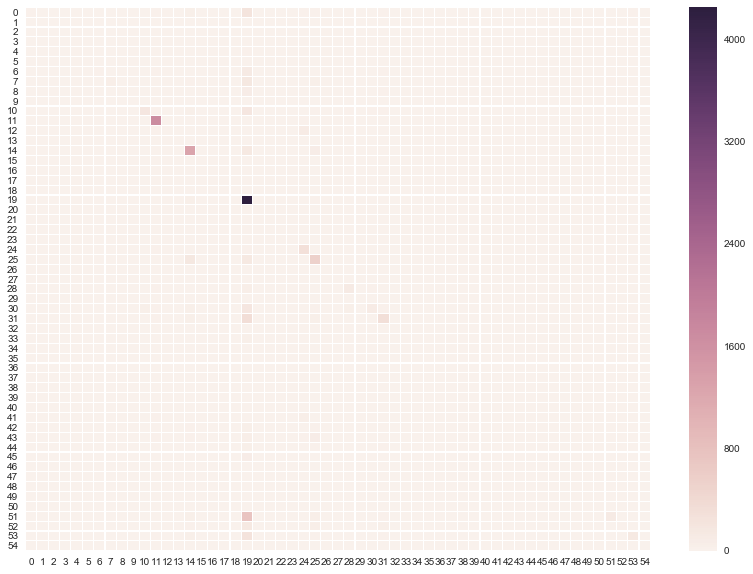

In [12]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
c_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))

f, ax= plt.subplots(figsize = (14, 10))
# sns.heatmap(c_mat, annot=True, fmt='d')
sns.heatmap(c_mat,linewidths=0.1,ax=ax)

In [7]:
import chest
import joblib
from keras.applications import resnet50
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from PIL import Image
import klepto

In [8]:
joblib.dump(estimator, filename='RandomForestClassifier2',protocol=2)
# pickle.dump(estimator, open('RandomForestClassifier.pkl', 'wb'), protocol=2)
# estimator = joblib.load('RandomForestClassifier')

NameError: name 'estimator' is not defined

In [ ]:
# cache = klepto.archives.file_archive('RandomForestClassifierklepto.pkl', estimator, serialized=True)
# cache.dump()

In [9]:
for i in range(0,y_test.size):
    print(y_test[i]," ",y_pred[i])

NameError: name 'y_test' is not defined

In [4]:
%%time
image_size = 224
n_channels = 3
model = resnet50.ResNet50(include_top=False,
                              weights='imagenet',
                              pooling=None,
                              input_shape=(image_size, image_size, n_channels))

NameError: name 'resnet50' is not defined

In [5]:
%%time
# Keras 2 uses steps.. this makes it difficult to process exactly
# all the entries so we may predict on a little more and then truncate
# steps = int(np.ceil(len(image_list) / float(batch_size)))
image = Image.open('test.jpg')
image = prepare_image(image,
                    (224, 224))

NameError: name 'Image' is not defined

In [6]:
%%time
tempArray = model.predict(image)

NameError: name 'model' is not defined

In [ ]:
result_label = encoder.classes_
result_proba = estimator.predict_proba(tempArray[0][0])

In [ ]:
result_label

In [ ]:
result_proba

In [ ]:
mapping = {}
for i in range(0,result_proba.size):
    mapping[result_label[i]]=result_proba[0][i]

In [ ]:
mapping